In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Assuming the dataset is a typical housing dataset, features might include:**

1. **CRIM** - per capita crime rate by town
2. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.  is mostly concentrated around 0, indicating that most areas have smaller lots.
3. **INDUS** - The proportion of non-retail business acres per town is fairly evenly distributed, with a slight skew towards lower values..
4. **CHAS** - The Charles River dummy variable shows that most towns do not bound the river (1 if tract bounds river; 0 otherwise)
5. **NOX** -Nitric oxides concentration is roughly normally distributed, with a few outliers. (parts per 10 million)
6. **RM** - The average number of rooms per dwelling is normally distributed, with most values between 5 and 7.
7. **AGE** -  The proportion of owner-occupied units built prior to 1940 is right-skewed, indicating that many towns have a high proportion of older homes.
8. **DIS** - Weighted distances to five Boston employment centres are left-skewed, indicating that many towns are closer to employment centers.
9. **RAD** - The index of accessibility to radial highways is right-skewed, with most towns having low accessibility.
10. **TAX** - The full-value property-tax rate per $10,000 is normally distributed.

11. **PTRATIO** - The pupil-teacher ratio by town is normally distributed, with a peak around 18-20.
12. **B** - The proportion of blacks by town is mostly concentrated around 400, with a few outliers.
13. **LSTAT** - The percentage of the lower status of the population is right-skewed, indicating that most towns have a low percentage of lower status population.
14. **MEDV** - The median value of owner-occupied homes is roughly normally distributed, with a peak around $20,000.




In [12]:
#Load the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# Set plot style
sns.set(style="whitegrid")


In [13]:
# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/content/drive/MyDrive/housing.csv', header=None, delimiter=r"\s+", names=column_names)
# Display the first few rows of the dataset
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [14]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [16]:
# Summary statistics of numerical features
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# Data types of all columns
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [18]:
# Checking for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Visualizations to understand the distribution of the features and the relationships between them.

**Distribution of Numerical Features**:-
Visualize the distribution of numerical features using histograms and KDE plot

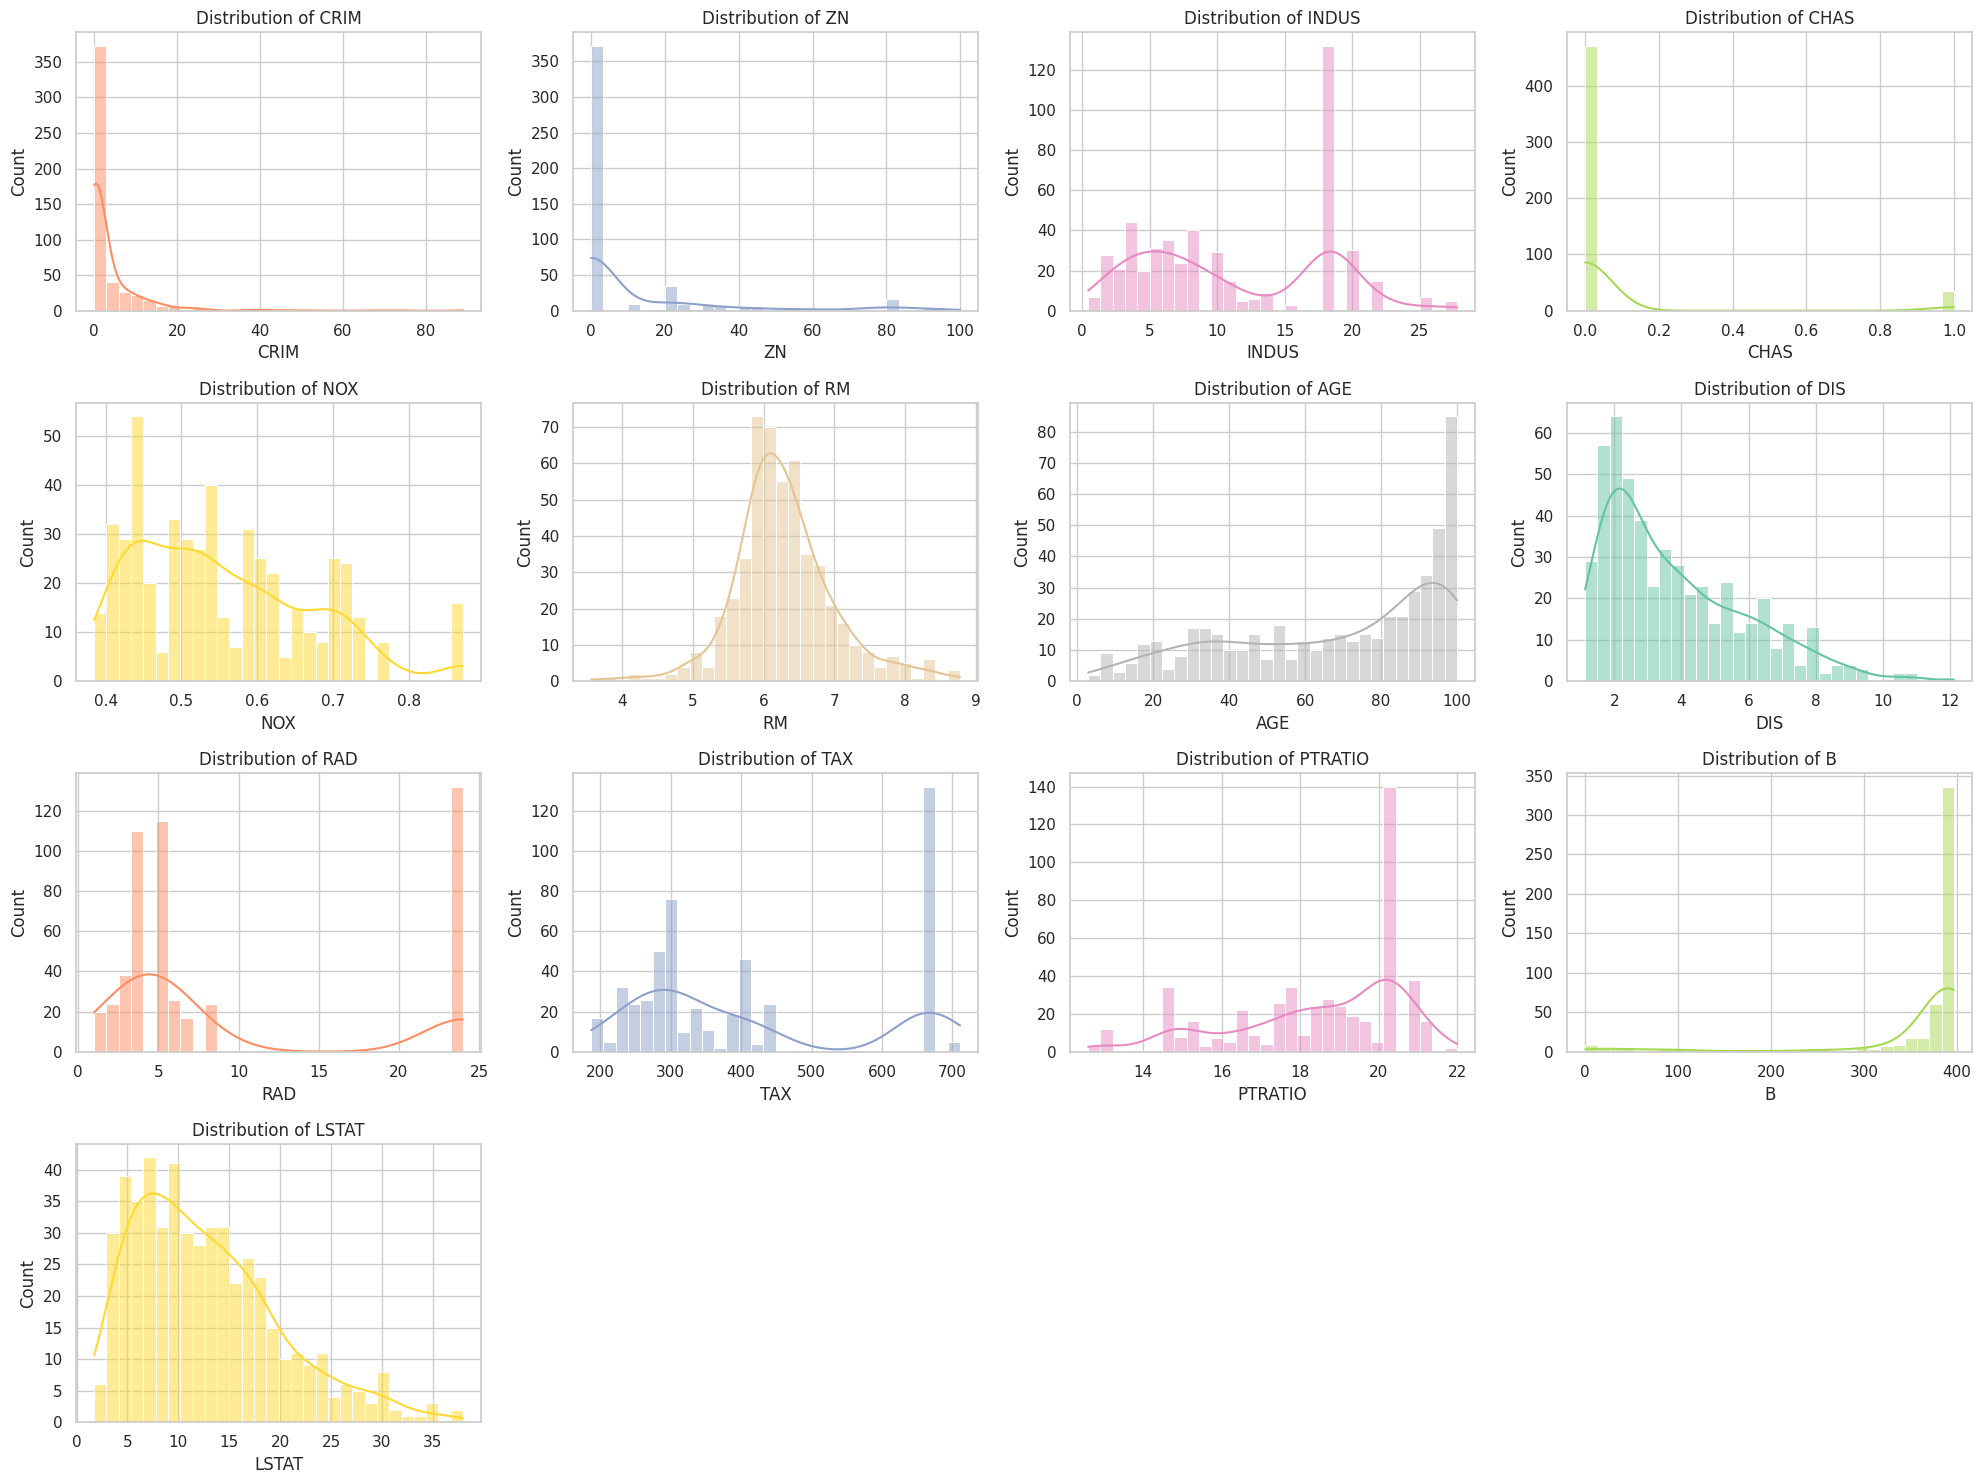

In [23]:
# List of numerical features
numerical_features = data.columns[:-1]

# Plotting distribution of numerical features
plt.figure(figsize=(20, 15))
# Get the Set2 color palette once, outside the loop
palette = sns.color_palette("Set2")
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    # Use the modulo operator to cycle through the palette colors
    sns.histplot(data[column], bins=30, kde=True, color=palette[i % len(palette)])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

**Box Plots**:-
Visualize the distribution of numerical features across different categories using box plots.

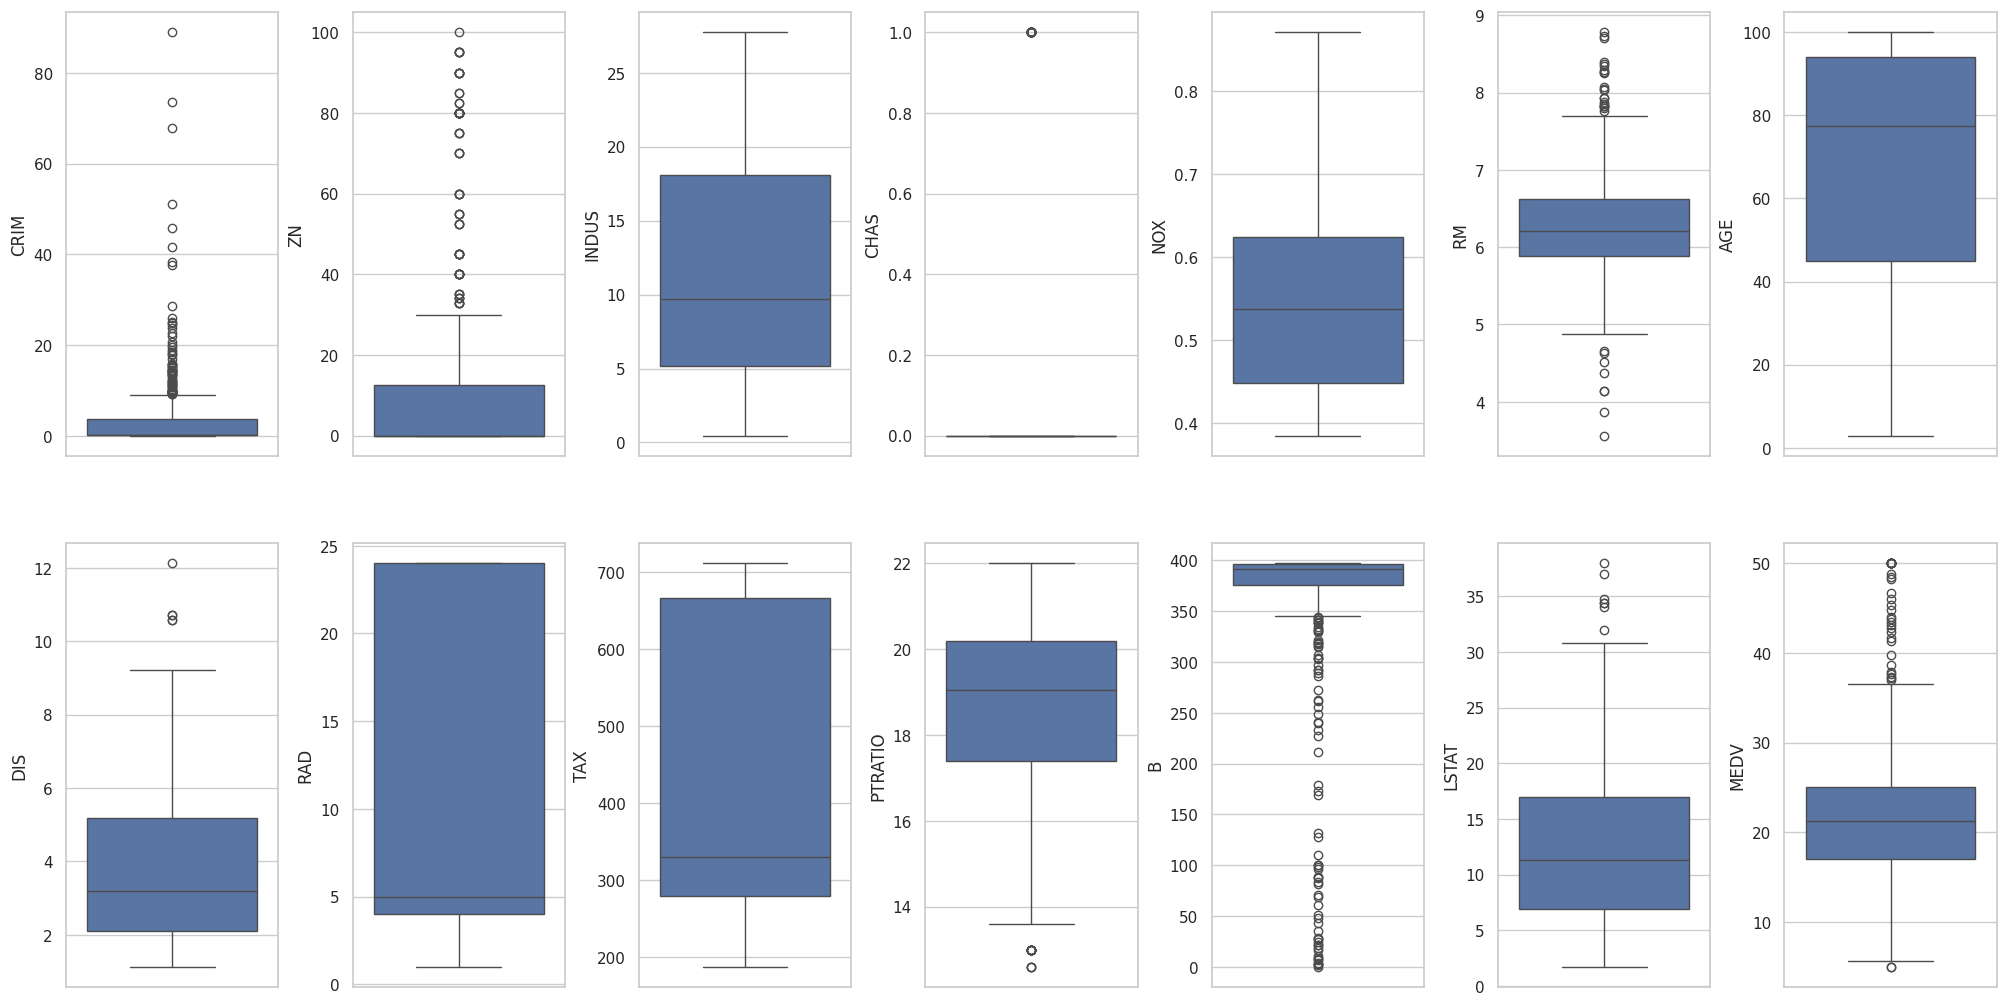

In [27]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
for index, (k, v) in enumerate(data.items()):
    sns.boxplot(y=k, data=data, ax=axs.flatten()[index])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

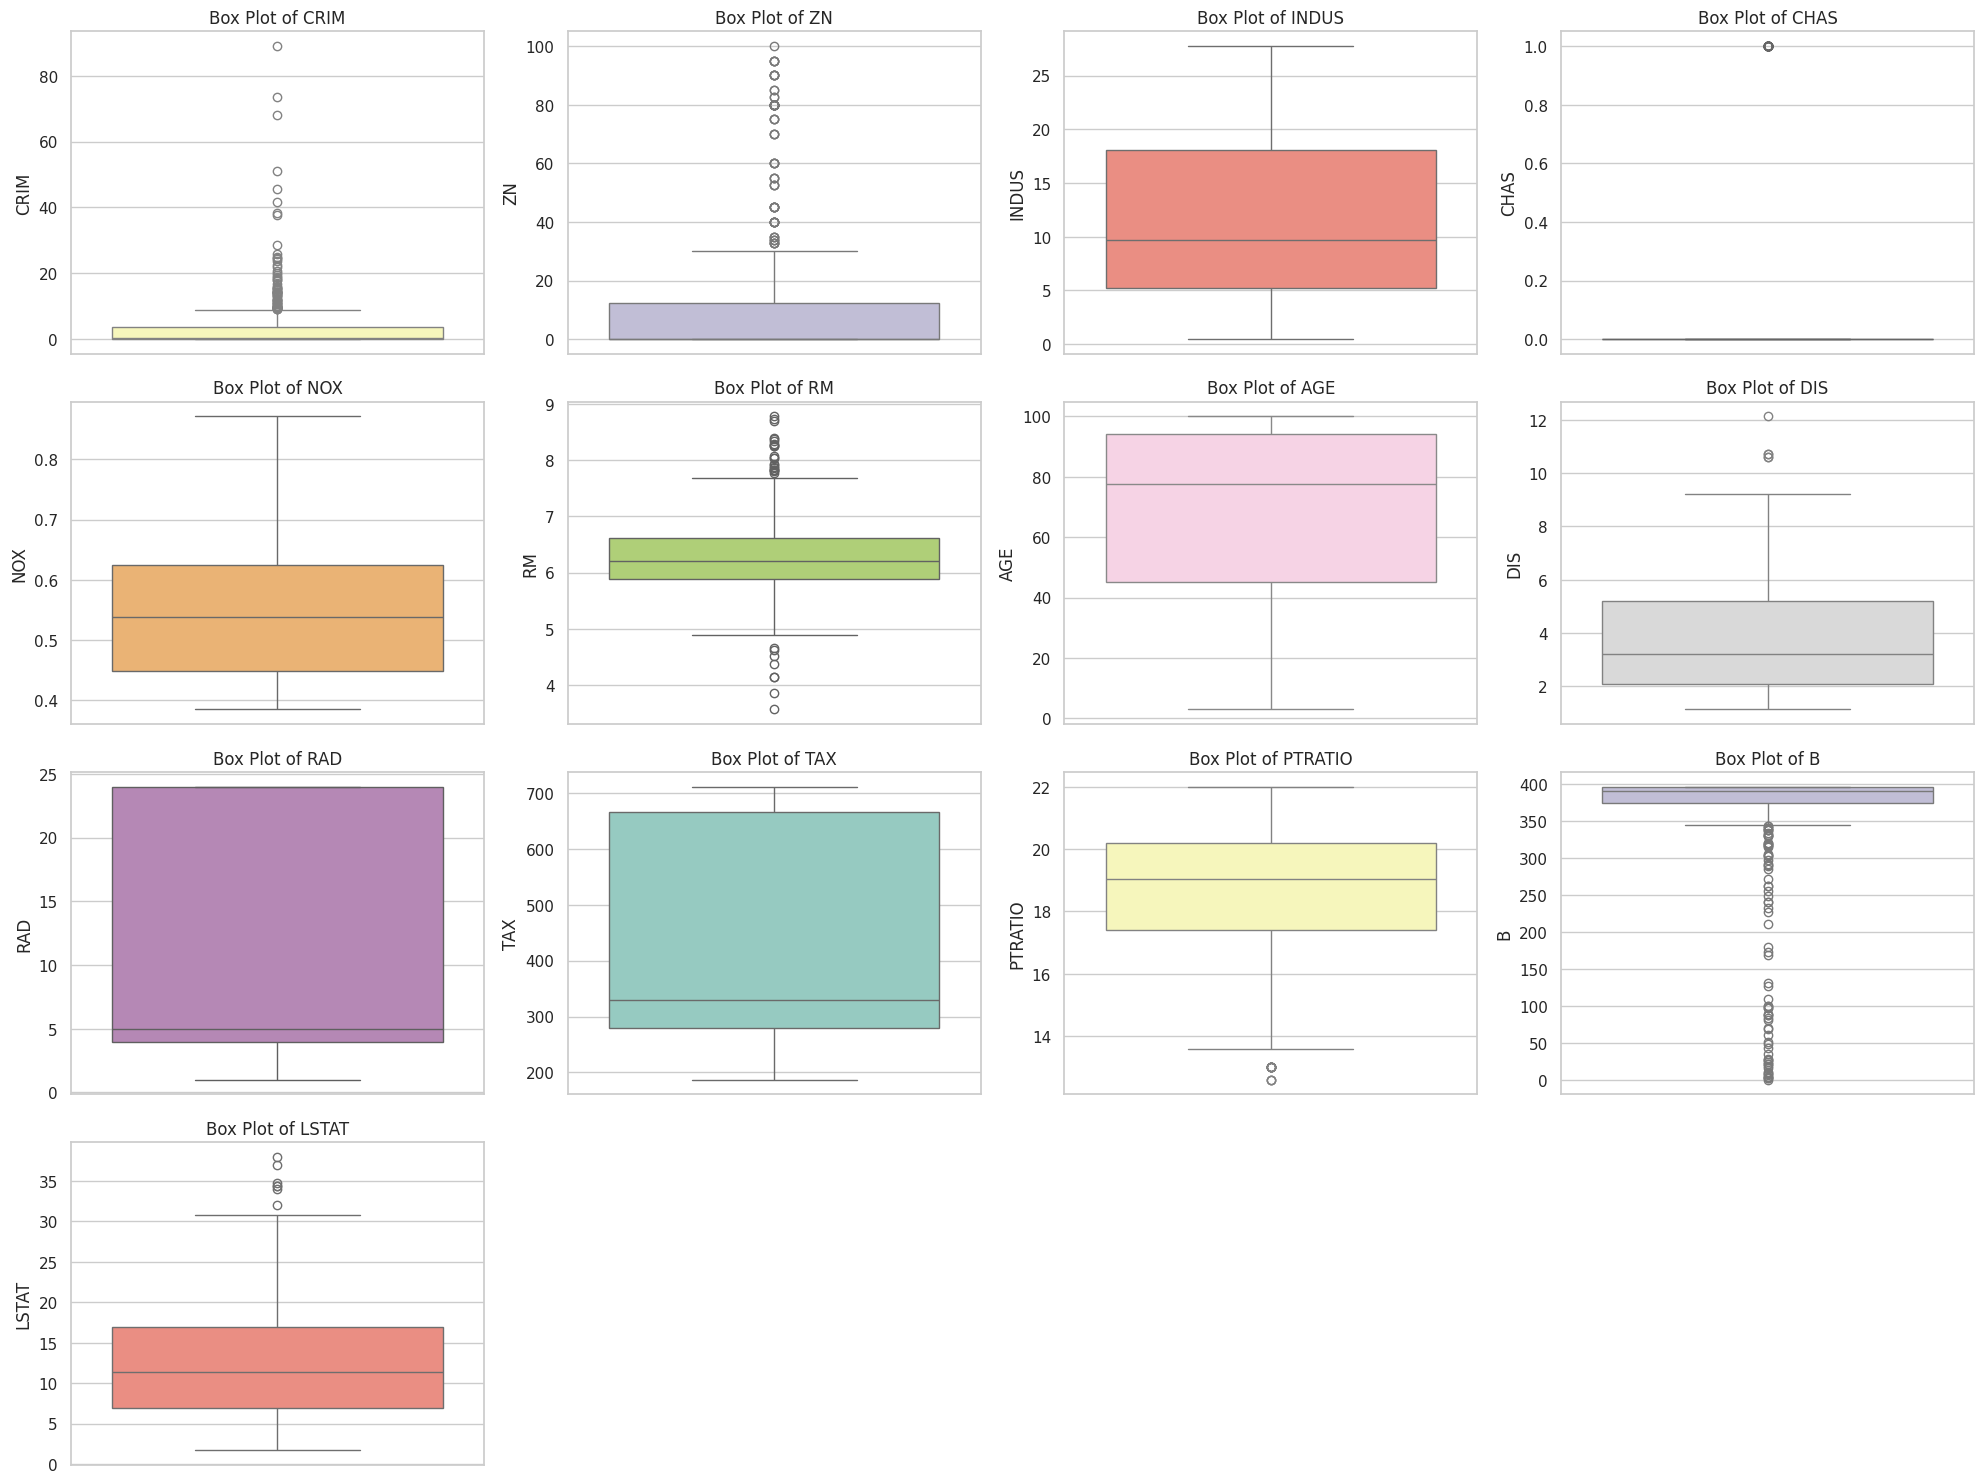

In [28]:
# Box plot for each numerical feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column], color=sns.color_palette("Set3")[i % 10])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


**Violin Plots**:-
Visualize the distribution of numerical features using violin plots.

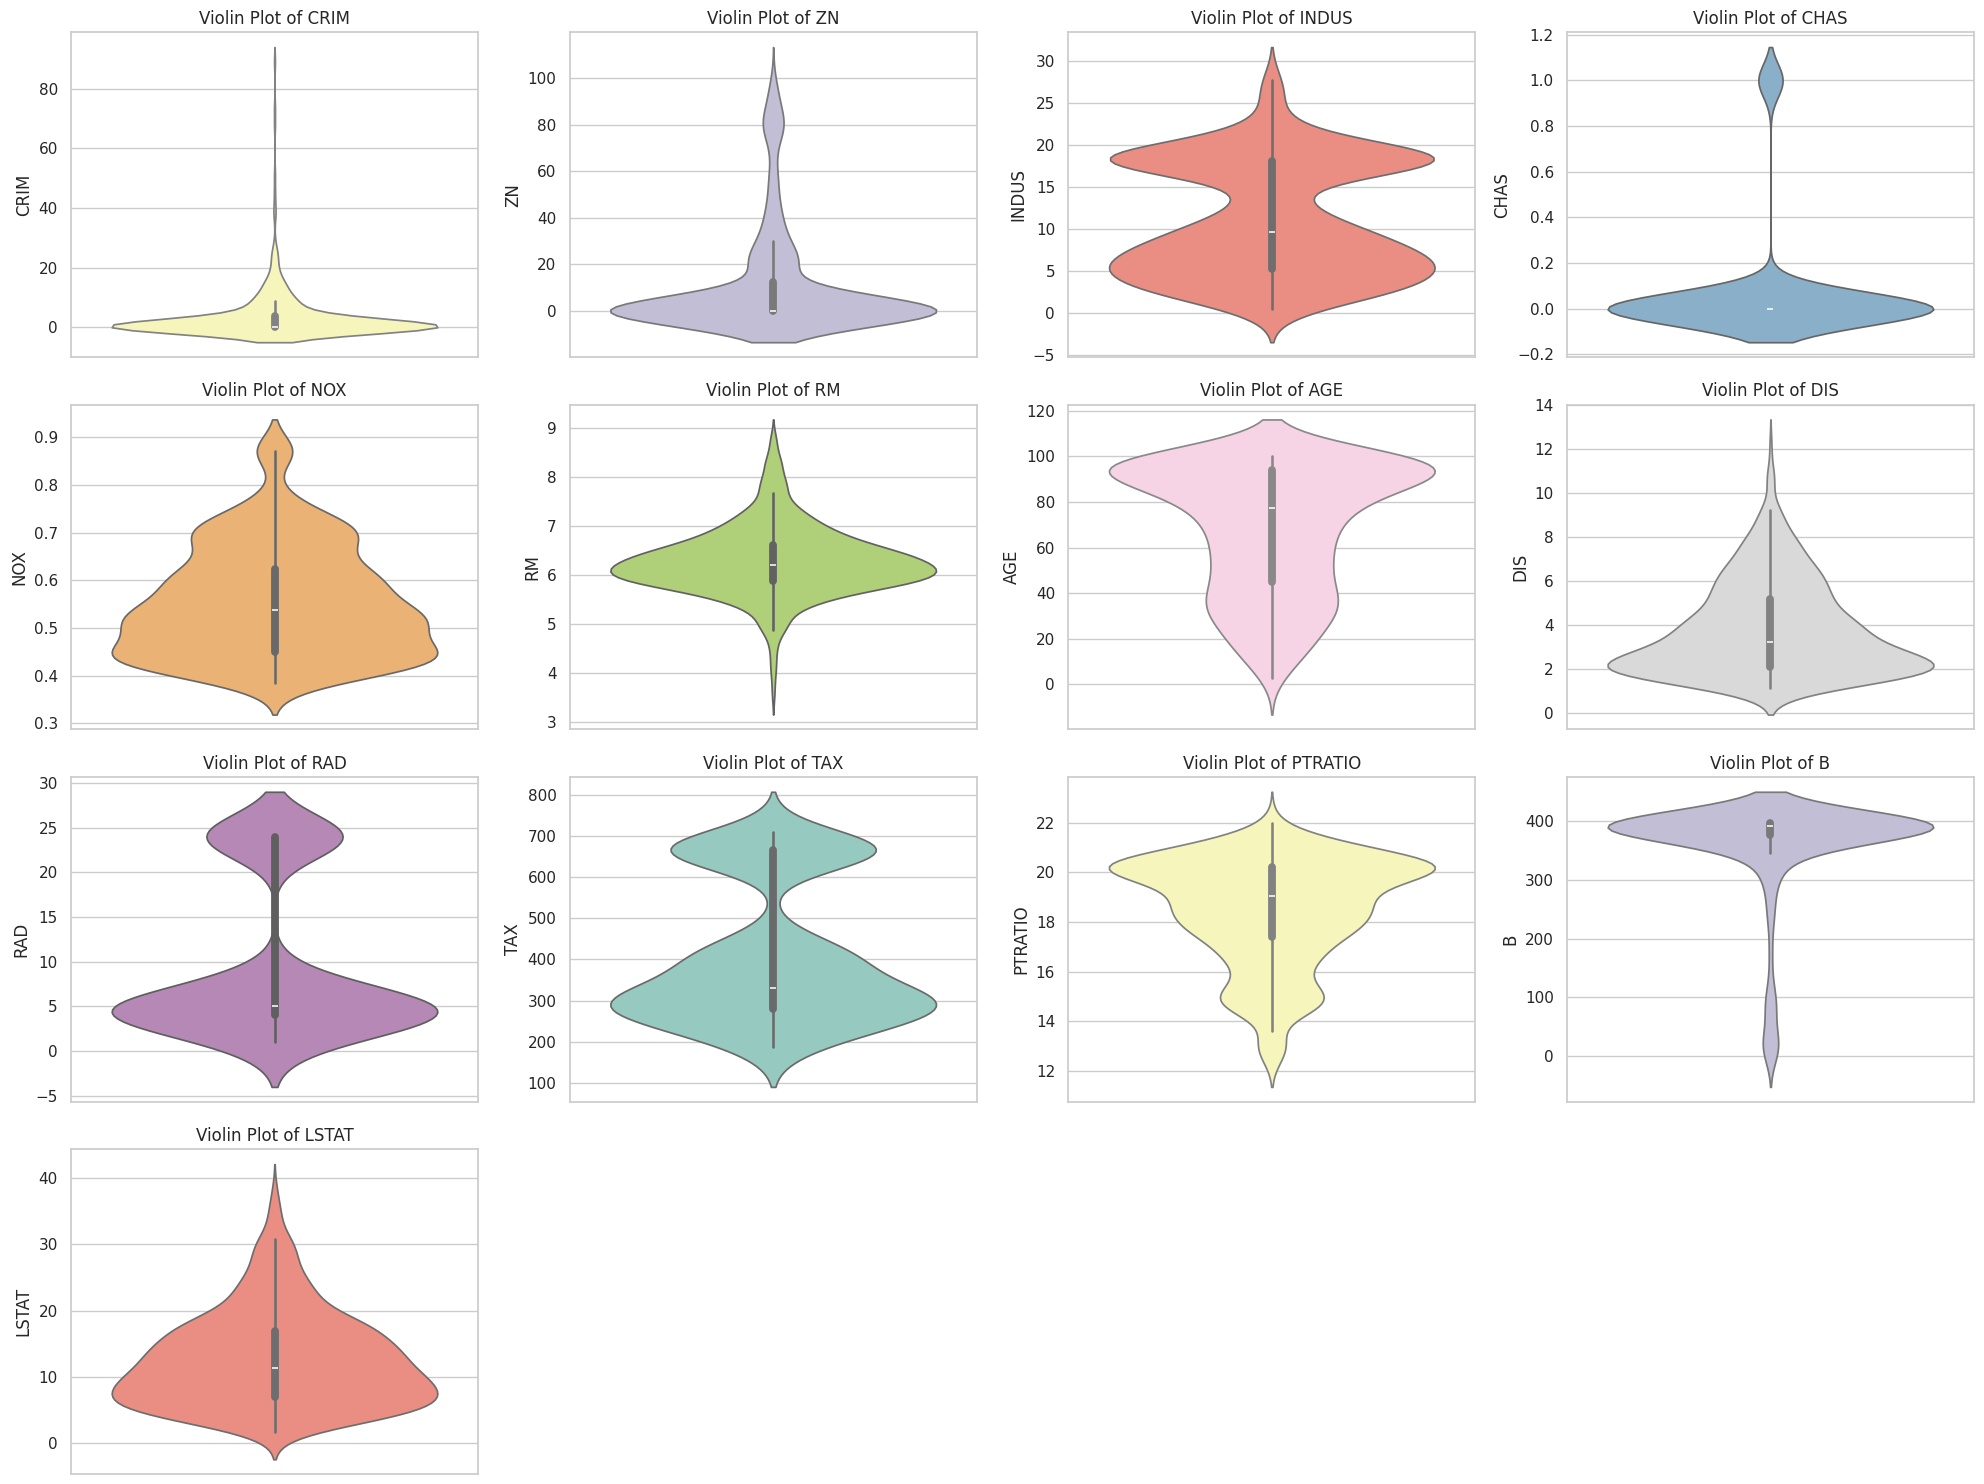

In [30]:
# Violin plot for each numerical feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(y=data[column], color=sns.color_palette("Set3")[i % 10])
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()


**Correlation Heatmap**:-
Visualize the correlation matrix to understand the relationships between numerical features.

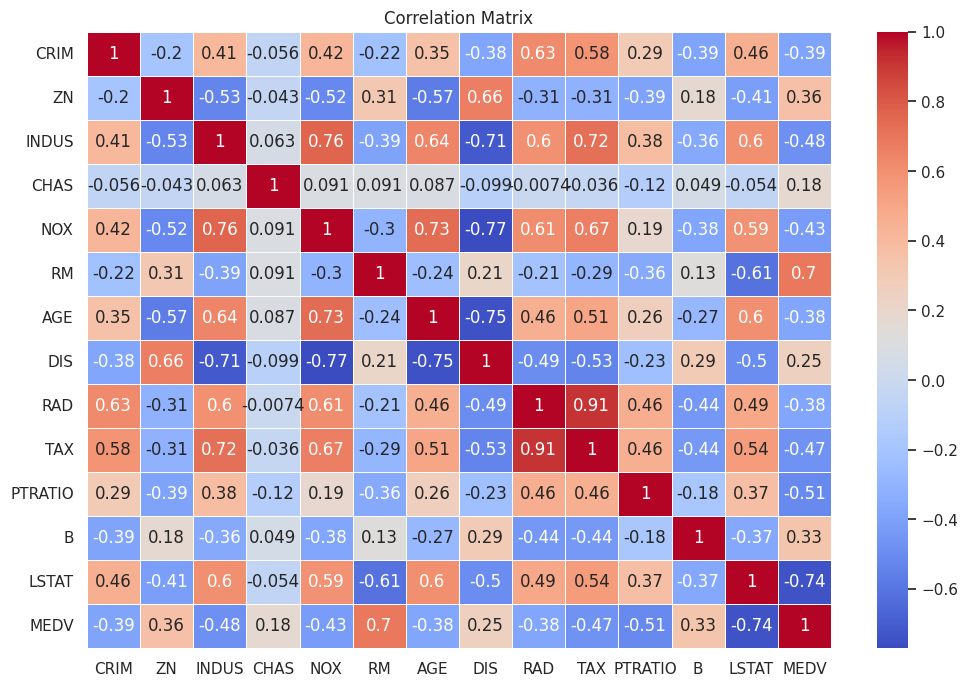

In [31]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Pairplot**:-
Visualize pairwise relationships between numerical features.

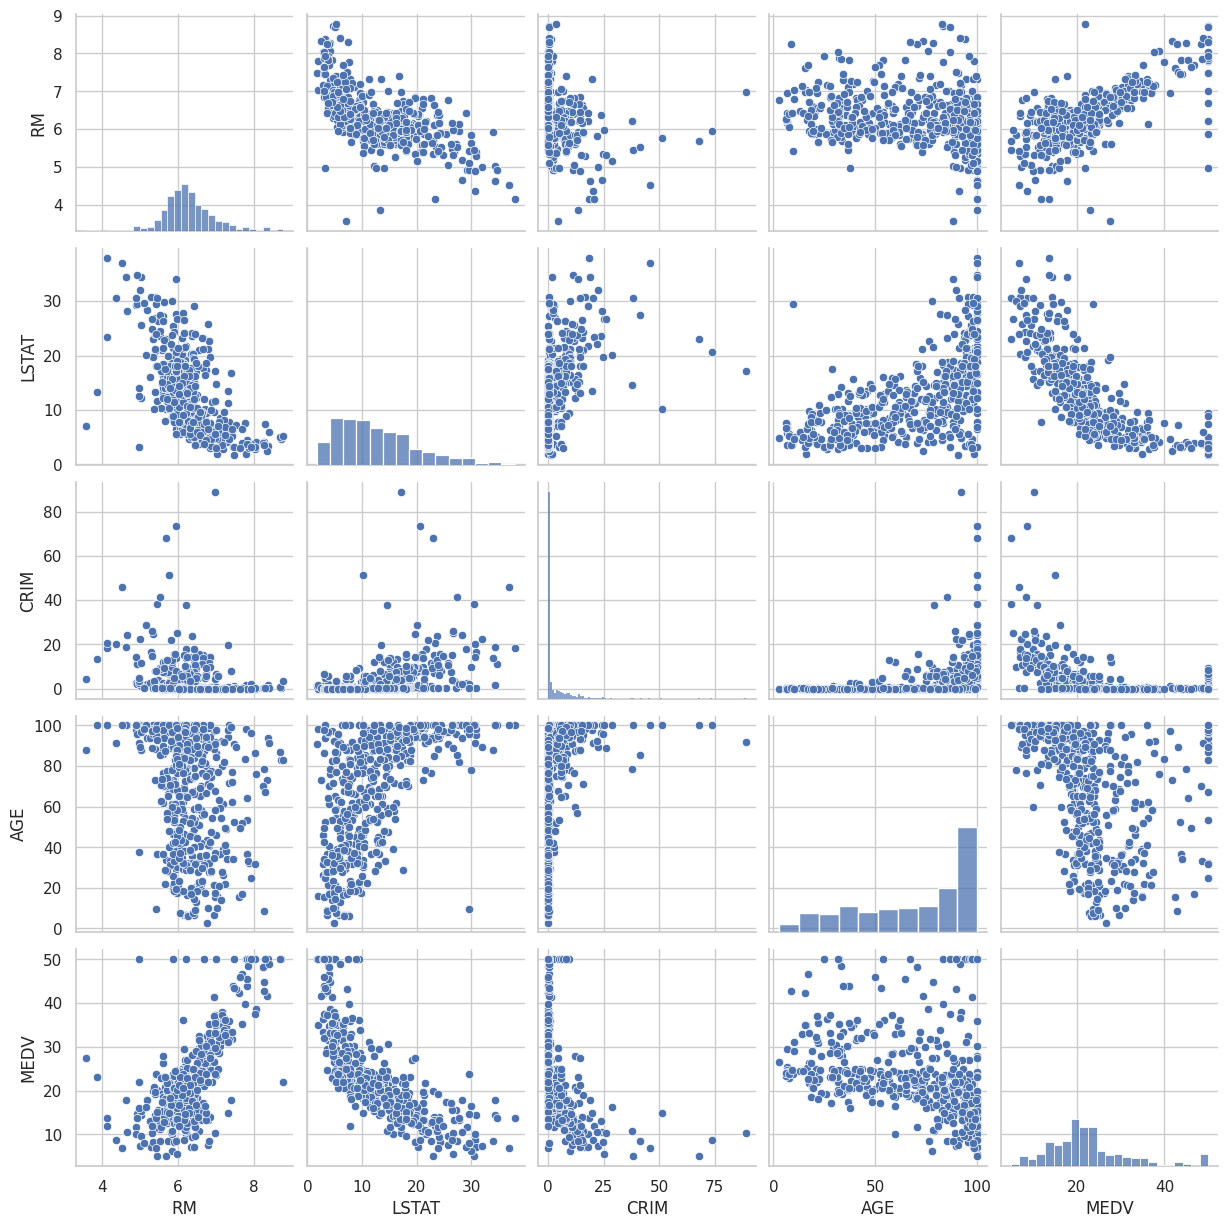

In [38]:
# Pairplot for numerical features in the dataset
sns.pairplot(data[['RM', 'LSTAT', 'CRIM', 'AGE', 'MEDV']])
plt.show()

**Feature Analysis and Visualizations**

Distribution of CRIM (Per capita crime rate by town)

CRIM: The distribution of per capita crime rate by town shows a right-skewed distribution, with most towns having low crime rates and a few towns having very high crime rates.

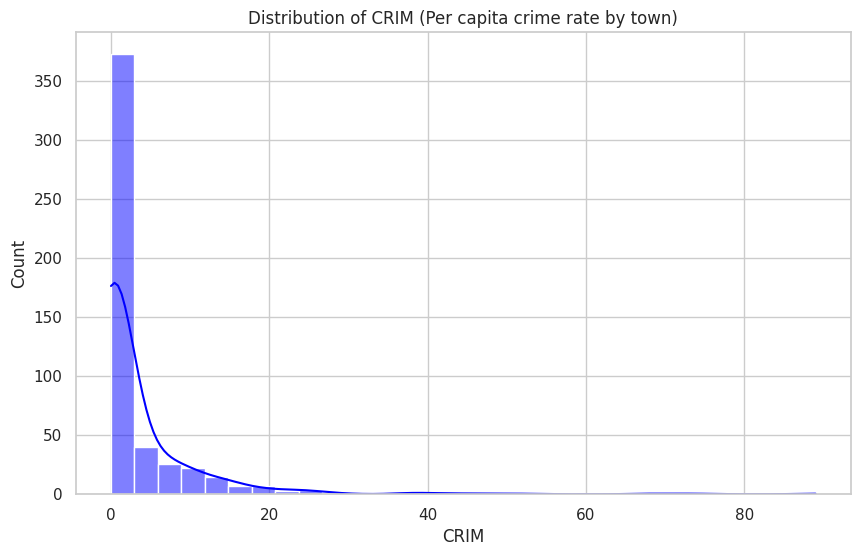

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CRIM'], bins=30, kde=True, color='blue')
plt.title('Distribution of CRIM (Per capita crime rate by town)')
plt.show()

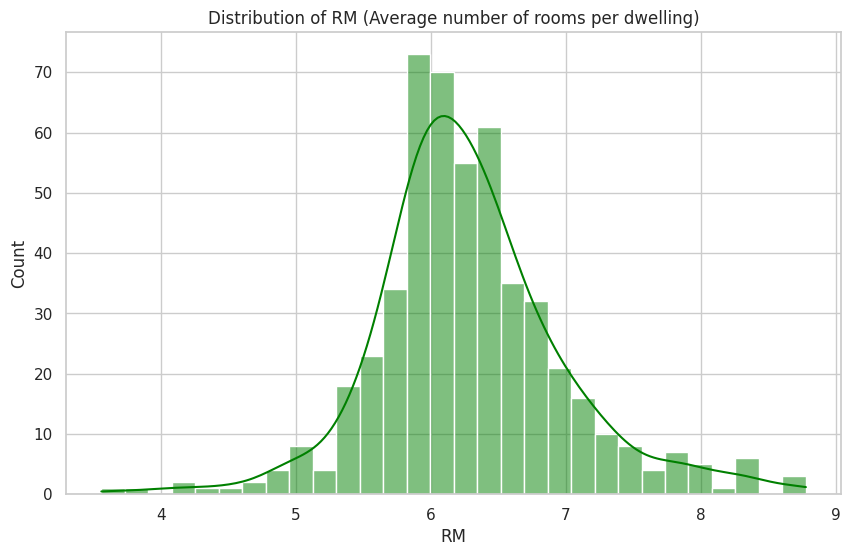

In [42]:
#Distribution of RM (Average number of rooms per dwelling)
plt.figure(figsize=(10, 6))
sns.histplot(data['RM'], bins=30, kde=True, color='green')
plt.title('Distribution of RM (Average number of rooms per dwelling)')
plt.show()


<ipython-input-43-7bc7532cb040>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CHAS', y='NOX', data=data, palette='Set2')


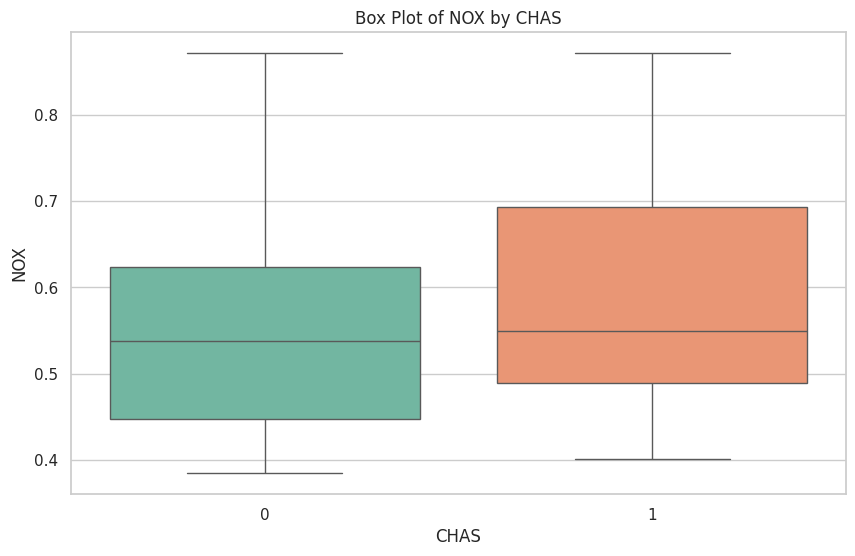

In [43]:
#Box Plot of NOX (Nitric oxides concentration) by Charles River dummy variable (CHAS)
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='NOX', data=data, palette='Set2')
plt.title('Box Plot of NOX by CHAS')
plt.show()


<ipython-input-44-04f1f3566c7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='CHAS', y='LSTAT', data=data, palette='Set1')


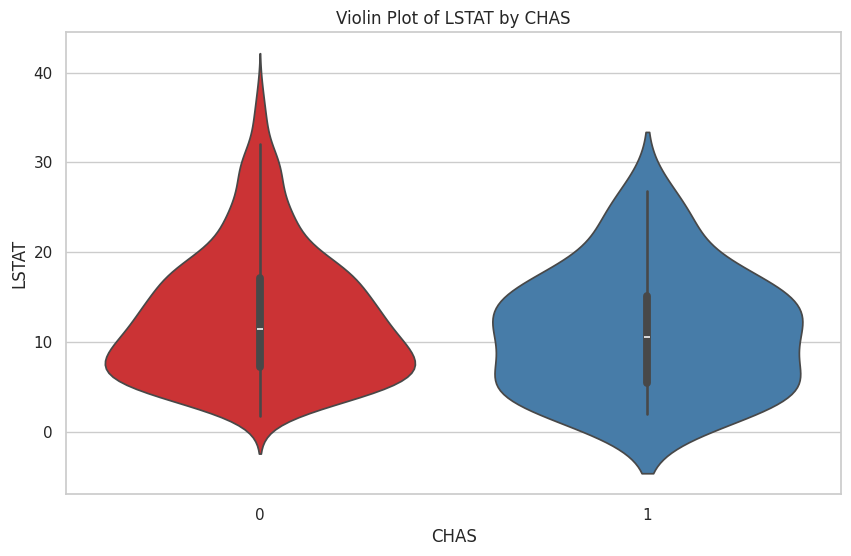

In [44]:
#Violin Plot of LSTAT (% lower status of the population) by Charles River dummy variable (CHAS)
plt.figure(figsize=(10, 6))
sns.violinplot(x='CHAS', y='LSTAT', data=data, palette='Set1')
plt.title('Violin Plot of LSTAT by CHAS')
plt.show()